In [1]:
# To automatically reload modules defined in external files.
%reload_ext autoreload
%autoreload 2

# To display plots directly in the notebook:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# To make the notebook reproducible
seed = 42
np.random.seed(seed)

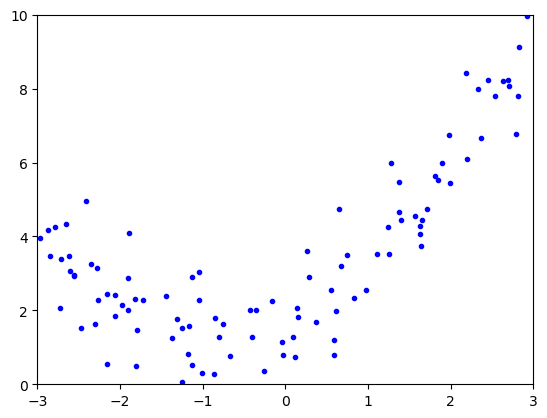

In [6]:
np.random.seed(seed)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m,1)

plt.plot(X,y, 'b.')
plt.axis([-3,3,0,10])
plt.show()

#dette er data som følger den kvadratiske fuksjonen: 2 + x + (1/2)x^2 med litt støy/ noise:

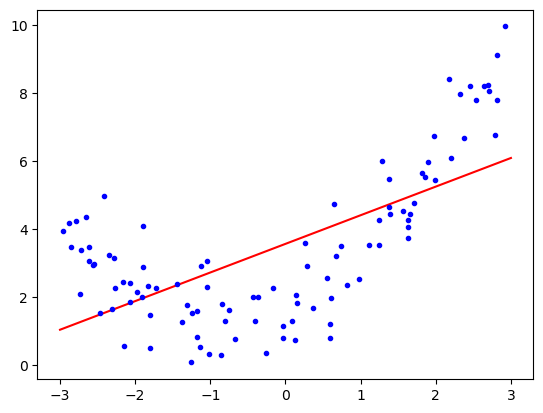

In [8]:
#vi kan prøve å lage en rett linje gjennom disse punktene med scikit-learn:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

theta = [lin_reg.intercept_, lin_reg.coef_]


X_new = np.array([[-3], [3]]) # We choose two new x-values to create our predicted straight line
y_predict = lin_reg.predict(X_new)

plt.plot(X_new, y_predict, 'r')
plt.plot(X, y, 'b.')
plt.show()

dette funket ikke så bra pga vi prøver å tilpasse en rett linje gjennom mer kompliserte data, men vi kan fortsatt bruke
    LinearRegression:
        istedenfor å bruke å bruke polynomet: $$y = \theta_0x_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$
        bruker vi: $$y = \theta_0x_0 + \theta_1 x_1 + \theta_2 x_1^2 + \theta_3 x_1^3  + \cdots + \theta_k x_1^k + \theta_{k+1} x_2 + \theta_{k+2} x_2^2 + \cdots \theta_{nk} x_n^k$$

This is called **polynomial regression**.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [22]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [23]:
X_poly[:5] # Original feature of X and the square of it

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [25]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

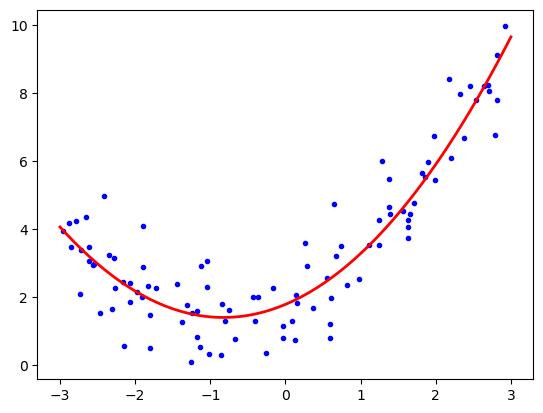

In [26]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.show()

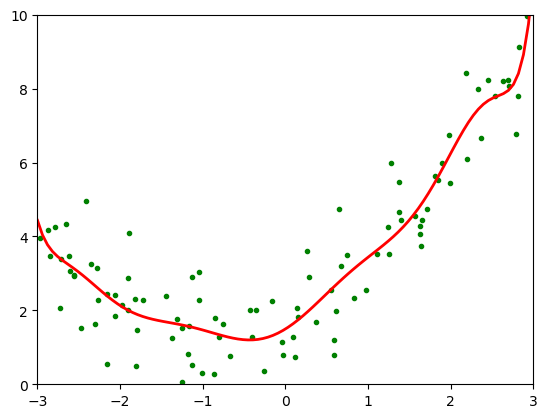

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

degree=10

#The following corresponds to the above diagram:
polynomial_regression = make_pipeline(
                                    PolynomialFeatures(degree=degree, include_bias=False),
                                    StandardScaler(),
                                    LinearRegression())

# Fit using the entire pipeline:
polynomial_regression.fit(X, y)

# Predict on new data (using the pipeline):
y_new = polynomial_regression.predict(X_new)

# Plot the result
plt.axis([-3, 3, 0, 10])
plt.plot(X, y, "g.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.show()

In [46]:
#kan gjøre dette om til en metode for letter bruk:

def plot_poly_regression(degree, ax=None):
    poly = get_pipeline(degree)
    poly.fit(X, y)
    y_new = poly.predict(X_new)

    created_fig = None
    if ax is None:
        created_fig, ax = plt.subplots()

    ax.axis([-3, 3, 0, 10])
    ax.plot(X, y, "b.")
    ax.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
    ax.set_title(f'Degree {degree}')

    # Vis figuren hvis vi laget den her
    if created_fig is not None:
        plt.show()

    return ax

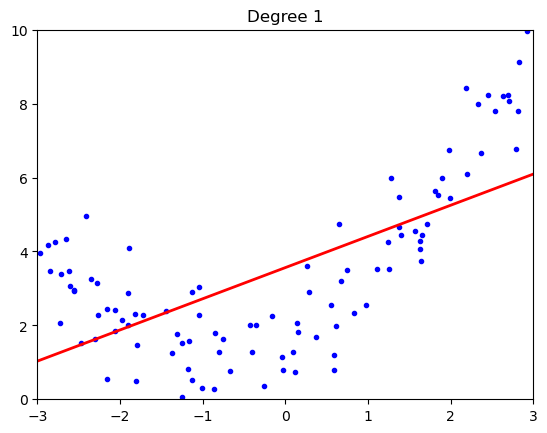

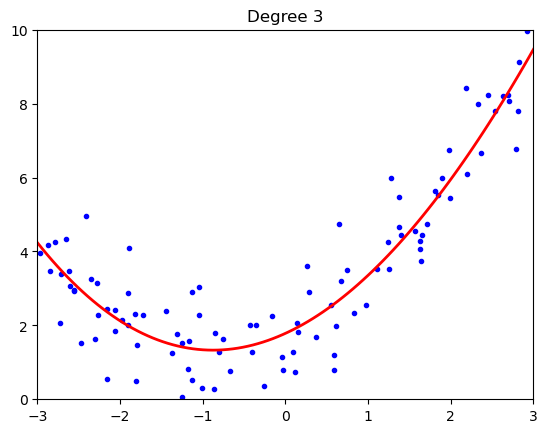

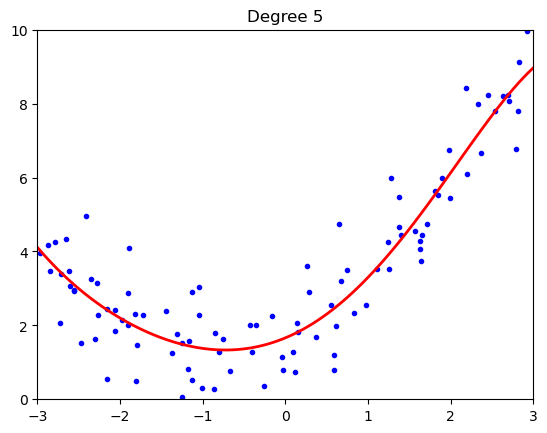

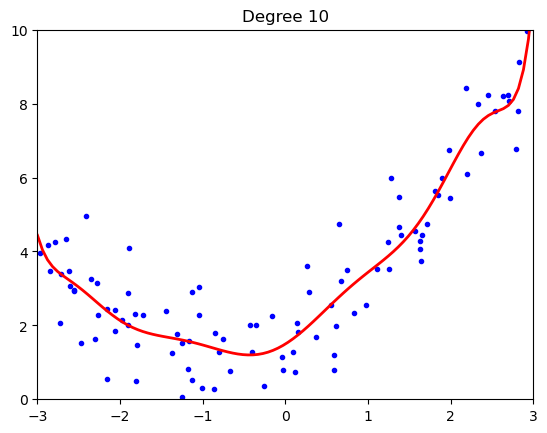

In [49]:
for degree in [1, 3, 5, 10]:
    plot_poly_regression(degree)

In [72]:
#learning curves:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [73]:
# Function taken from the textbook by A. Géron
def plot_learning_curves(model, X, y):
    
    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    # For storing the results
    train_errors, val_errors = [], []
    
    # Calculate RMSE as we increase the data size
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # Plot the results
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14) 
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.title('Learning curves')

In [74]:
def plot_learning_curves_linreg(degree, axis=[0, 80, 0, 3]):
    poly_reg = get_pipeline(degree)
    _ = plot_poly_regression(degree)
    plt.figure(figsize=(8,6))
    plot_learning_curves(poly_reg, X, y)
    plt.axis(axis)
    plt.show()  

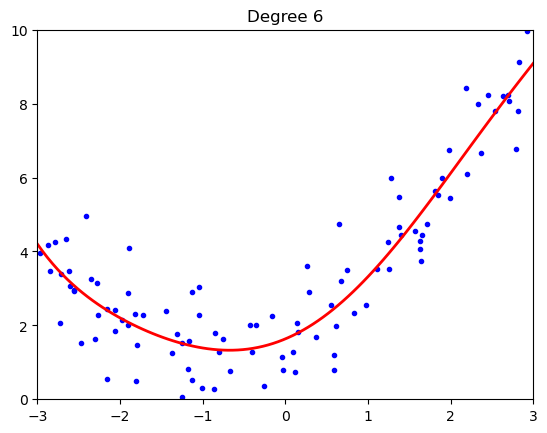

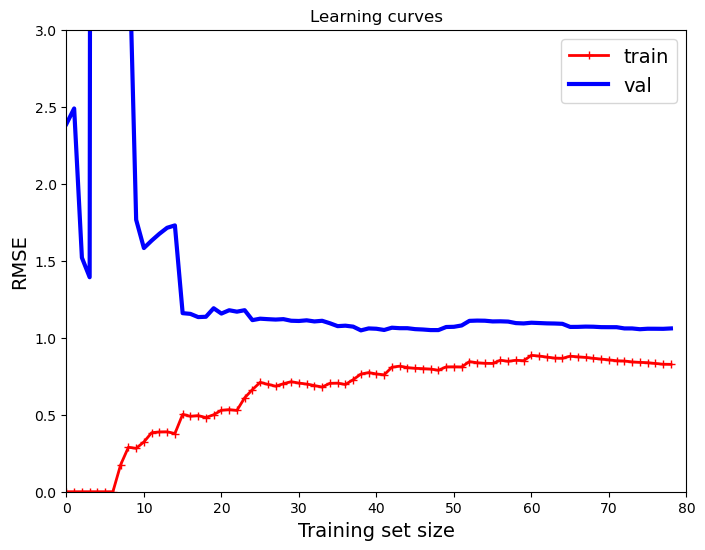

In [75]:
plot_learning_curves_linreg(degree=6)

In [54]:
#denne grafen viser at når vi har lite treningsdata, da har vi veldig lite feil i modellen, dette er et
#tegn på overfitting, modellen greire å "huske" dataen. vi ser det at modellen lærer godt etter hvert
#som den får mer data, men den har fortsatt en del feil. modellen er ikke perfekt.

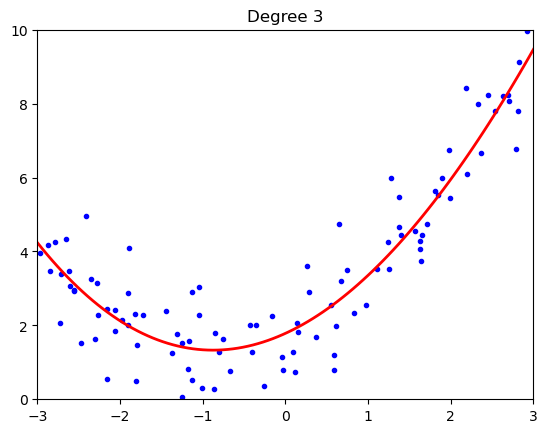

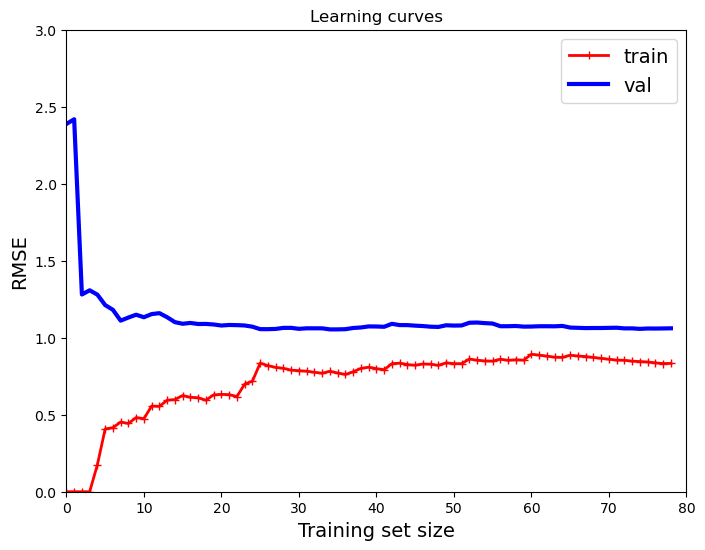

In [76]:
plot_learning_curves_linreg(degree=3)

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np

degrees = range(1, 11)
scores = []

for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d, include_bias=False),
                          LinearRegression())
    # Vi bruker negativ MSE fordi sklearn maksimerer score
    score = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
    scores.append(np.mean(score))

best_degree = degrees[np.argmax(scores)]
print(f"Beste grad: {best_degree}")

Beste grad: 2


In [83]:
poly_reg = get_pipeline(degree=1)

In [84]:
from sklearn.model_selection import validation_curve

In [85]:
degrees = range(1,17)

In [86]:
train_scores, validation_scores = validation_curve(poly_reg, X, y,
                                                   param_name='polynomialfeatures__degree',
                                                   param_range=degrees,
                                                   scoring='neg_mean_squared_error', 
                                                   cv=5)

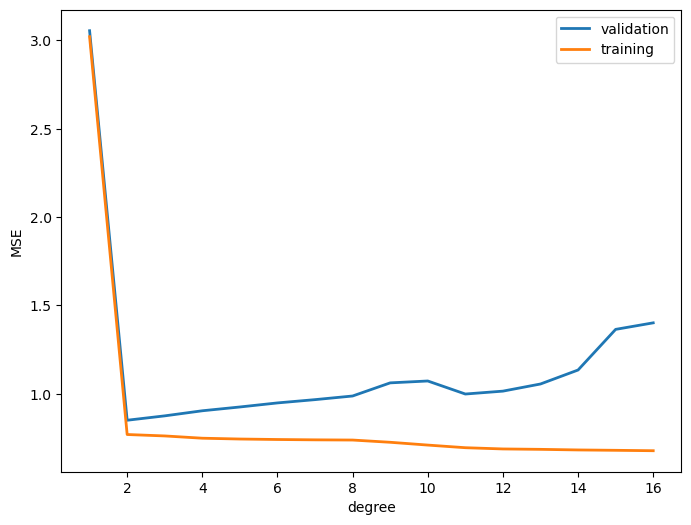

In [87]:
plt.figure(figsize=(8, 6))
plt.plot(degrees, -validation_scores.mean(axis=1), lw=2,
         label='validation')
plt.plot(degrees, -train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()